<a href="https://colab.research.google.com/github/JorgeRivero1/EDA_Netflix/blob/main/EDA_NETFLIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()  # Sube aquí tu archivo kaggle.json otra vez


In [2]:
!mkdir -p /root/.config/kaggle
!mv kaggle.json /root/.config/kaggle/kaggle.json
!chmod 600 /root/.config/kaggle/kaggle.json


In [3]:
from kaggle.api.kaggle_api_extended import KaggleApi
import os
import pandas as pd

api = KaggleApi()
api.authenticate()

# Descargamos los archivos
os.makedirs("datasets", exist_ok=True)
api.dataset_download_files("shivamb/netflix-shows", path="datasets", unzip=True)

# Leemos el dataset
df = pd.read_csv("datasets/netflix_titles.csv")
df.head()


Dataset URL: https://www.kaggle.com/datasets/shivamb/netflix-shows


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
for i in df.columns:
    null_rate = round(df[i].isnull().sum() / len(df) * 100,2)

    if null_rate > 0:
        print(f'{i} null rate: {null_rate} %')

director null rate: 29.91 %
cast null rate: 9.37 %
country null rate: 9.44 %
date_added null rate: 0.11 %
rating null rate: 0.05 %
duration null rate: 0.03 %


In [7]:
df['rating'].value_counts(dropna=False)

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [8]:
# Eliminamos los tres datos de duración que no pertenecen a esta categoría
df = df[~df['rating'].isin(['74 min', '84 min', '66 min'])]

# Transformamos los valores nulos de la columna rating al valor más repetido
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

<ipython-input-8-0cfa26748aea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].fillna(df['rating'].mode()[0])


In [9]:
# Remplazamos los valores nulos por 'No Data'
df['director'] = df['director'].replace(np.nan, 'No Data')
df['cast'] = df['cast'].replace(np.nan, 'No Data')
df['country'] = df['country'].replace(np.nan, 'No Data')

<ipython-input-9-39fb3c3ce9e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['director'] = df['director'].replace(np.nan, 'No Data')
<ipython-input-9-39fb3c3ce9e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cast'] = df['cast'].replace(np.nan, 'No Data')
<ipython-input-9-39fb3c3ce9e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [10]:
# Eliminamos los valores nulos de la columna 'date_added'
df = df.dropna(subset=['date_added'])

In [11]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8794 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8794 non-null   object
 1   type          8794 non-null   object
 2   title         8794 non-null   object
 3   director      8794 non-null   object
 4   cast          8794 non-null   object
 5   country       8794 non-null   object
 6   date_added    8794 non-null   object
 7   release_year  8794 non-null   int64 
 8   rating        8794 non-null   object
 9   duration      8794 non-null   object
 10  listed_in     8794 non-null   object
 11  description   8794 non-null   object
dtypes: int64(1), object(11)
memory usage: 893.1+ KB


In [13]:
# Convertir la columna 'date_added' a formato de fecha (datetime)
df['date_added'] = df['date_added'].str.strip()
df["date_added"] = pd.to_datetime(df['date_added'], format='%B %d, %Y')

<ipython-input-13-1e0648c67355>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_added'] = df['date_added'].str.strip()


In [14]:
df['month'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

In [15]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021


In [16]:
df_movie = df[df['type'] == 'Movie'].copy()

In [17]:
# Limpiamos la columna 'duration' eliminando el texto ' min' y convertirla a entero.
df_movie['duration'] = df_movie['duration'].str.replace(' min', '').astype(int)
df_movie.rename(columns = {'duration': 'duration(min)'}, inplace = True)

In [18]:
df_tvshow =  df[df['type'] == 'TV Show'].copy()

In [19]:
df['type'].value_counts().index

Index(['Movie', 'TV Show'], dtype='object', name='type')

In [20]:
df['type'].value_counts().index

Index(['Movie', 'TV Show'], dtype='object', name='type')

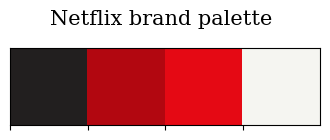

In [21]:
# Palette tipo Netflix
sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])

plt.title("Netflix brand palette ",loc='center',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

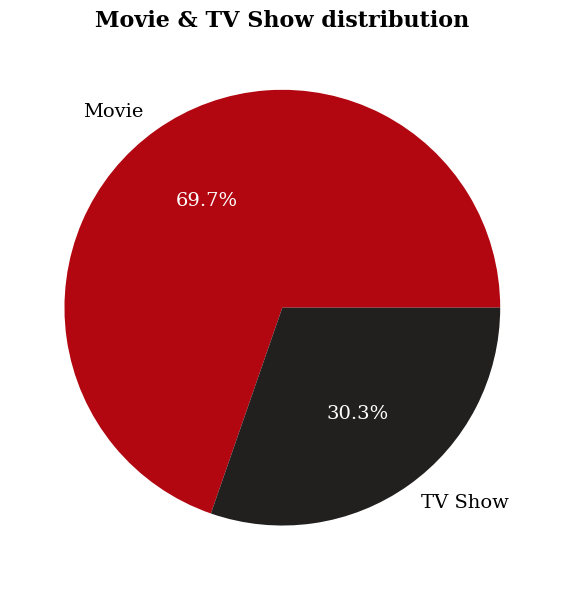

In [22]:
conteo = df['type'].value_counts()

# Paleta Netflix
colores = ['#b20710', '#221f1f']

plt.figure(figsize=(6,6))

# Graficamos el diagrama ciruclar
wedges, texts, autotexts = plt.pie(
    conteo,
    labels=conteo.index,
    autopct='%1.1f%%',
    colors=colores,
    textprops={'color': 'black', 'fontfamily' : 'serif', 'fontsize': 14}
)

# Cambiamos el color de los porcentajes (autotexts) a blanco
for autotext in autotexts:
    autotext.set_color('white')

plt.title('Movie & TV Show distribution', color='black', fontfamily = 'serif', fontweight='bold', fontsize= 16)  # Título también negro para respetar el fondo blanco


plt.tight_layout()
plt.show()


## 2. Películas por año

In [23]:
# Contamos cuántas producciones se lanzaron por año
annual_distribution = df['release_year'].value_counts().reset_index().sort_values(by='release_year', ascending= True)

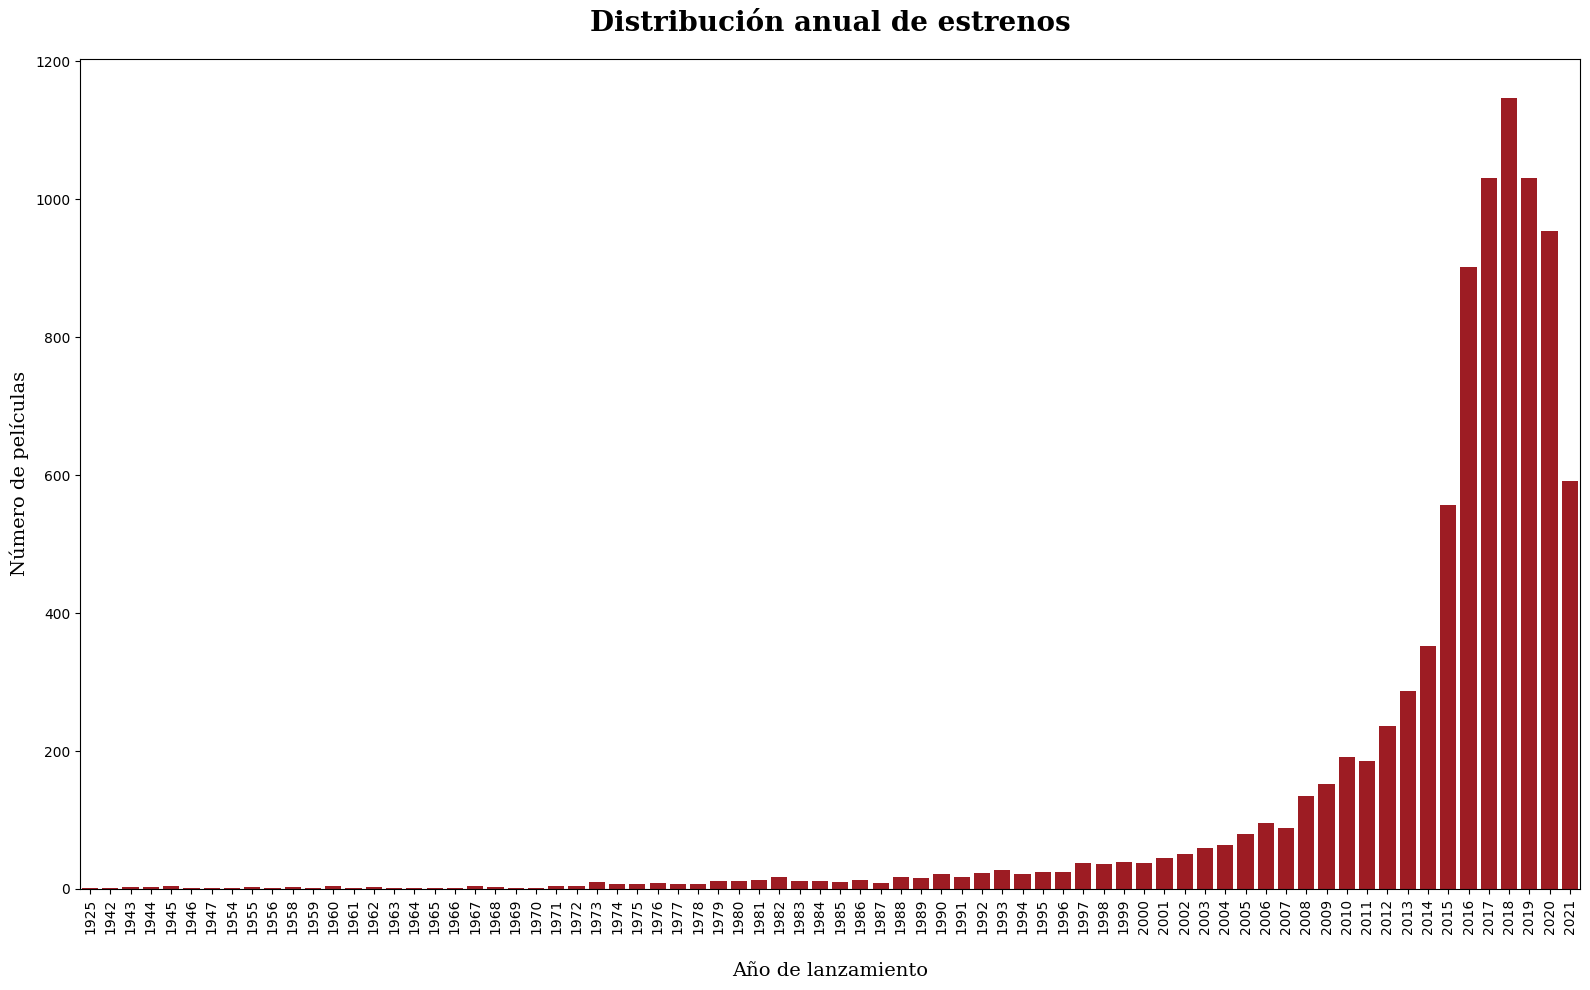

In [24]:
# Crear un gráfico de barras que muestra la cantidad de estrenos por año.

plt.figure(figsize=(16,10))

sns.barplot(annual_distribution, x='release_year', y='count', color = '#b20710')

plt.title('Distribución anual de estrenos', fontfamily = 'serif', fontweight='bold', fontsize = 20, pad=20)
plt.xlabel('Año de lanzamiento',fontfamily = 'serif', fontsize= 14, labelpad=20)
plt.ylabel('Número de películas', fontfamily = 'serif', fontsize= 14)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## 3. Distribución de películas y series por país

In [25]:
df1 = df.copy()

In [26]:
# Separamos los países en la columna 'country' y los convertimos en listas usando la coma como separador
df1['country'] = df1['country'].str.split(', ')

In [27]:
df1 = df1.explode('country')

In [28]:
# Filtrar filas eliminando aquellas donde la columna 'country' tiene el valor 'No Data'
df1 = df1[df1['country'] != 'No Data']

In [29]:
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,September,2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ghana,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,September,2021


In [30]:
df1['country'].value_counts().head(10)

,count
country,
United States,3680
India,1046
United Kingdom,803
Canada,445
France,393
Japan,317
Spain,232
South Korea,231
Germany,226


In [31]:
# Agrupamos el DataFrame por país y tipo (película o serie), contamos las ocurrencias
# y reorganizamos los resultados en una tabla con los tipos como columnas
df1 = df1.groupby(['country', 'type']).size().unstack(fill_value=0)

In [32]:
# Calculamos el total de producciones (películas + series) por país y añadirlo como una nueva columna
df1['total'] = df1.sum(axis=1)

In [33]:
df1 = df1.sort_values(by='total', ascending = False).head(10)

In [34]:
df1 = df1.drop('total', axis= 1)

In [35]:
df1

type,Movie,TV Show
country,,
United States,2748,932
India,962,84
United Kingdom,532,271
Canada,319,126
France,303,90
Japan,119,198
Spain,171,61
South Korea,61,170
Germany,182,44


In [36]:
# Normalizamos los valores por país para obtener la proporción relativa de cada tipo (película, serie) respecto al total
df1 = df1.div(df1.sum(axis=1), axis=0)

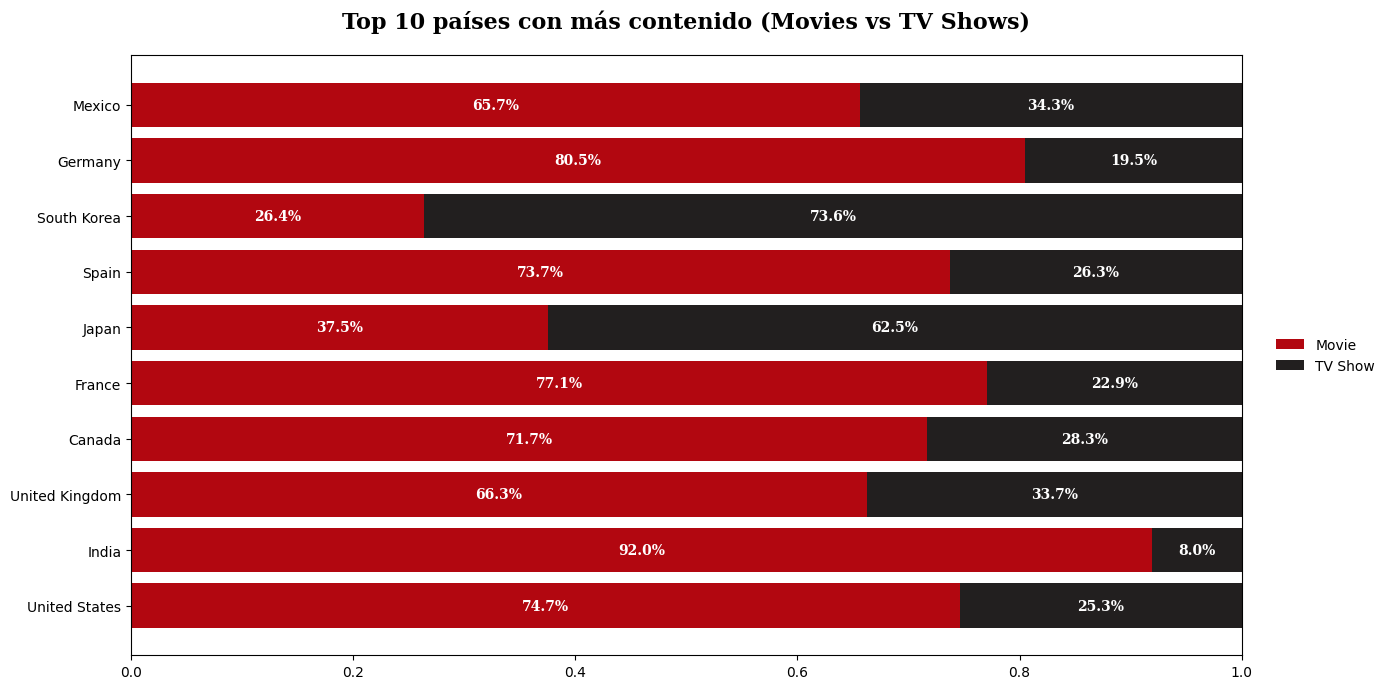

In [37]:
fig, ax = plt.subplots(figsize=(14,7))

# Barras
ax.barh(df1.index, width=df1['Movie'], color='#b20710', label='Movie')
ax.barh(df1.index, width=df1['TV Show'], left=df1['Movie'], color='#221f1f', label='TV Show')

# Eje x hasta 1 (100%)
ax.set_xlim(0, 1)

# Título
ax.set_title('Top 10 países con más contenido (Movies vs TV Shows)',
             fontfamily='serif', fontweight='bold', fontsize=16, pad=20)

# Porcentajes sobre las barras
for i in df1.index:
    # Porcentaje de películas
    movie_pct = df1.loc[i, 'Movie']
    ax.annotate(f"{movie_pct*100:.1f}%",
                xy=(movie_pct / 2, i),
                va='center', ha='center',
                fontsize=10, color='white', fontweight='bold', fontfamily='serif')

    # Porcentaje de series
    tv_pct = df1.loc[i, 'TV Show']
    ax.annotate(f"{tv_pct*100:.1f}%",
                xy=(movie_pct + tv_pct / 2, i),
                va='center', ha='center',
                fontsize=10, color='white', fontweight='bold', fontfamily='serif')

# Leyenda fuera del gráfico (a la derecha)
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=False)

plt.tight_layout()
plt.show()


## 4. Calificación de peliculas

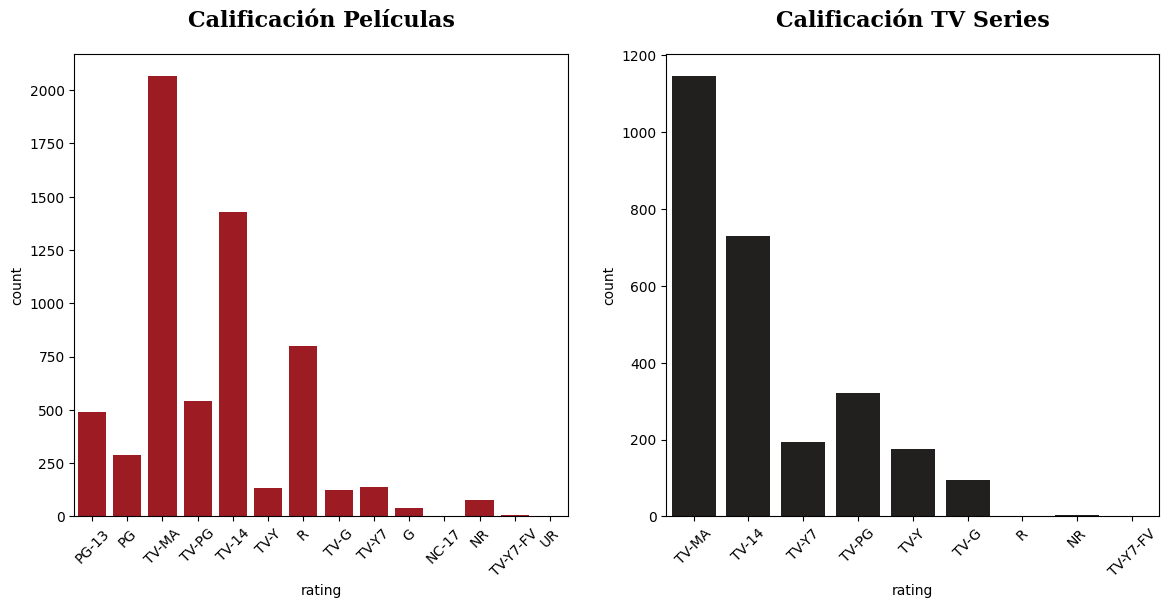

In [38]:
fig, ax = plt.subplots(1,2, figsize = (14,6))

# Creamos un gráfico de conteo (countplot) para las calificaciones de películas en el primer subplot
sns.countplot(df_movie, x= 'rating', ax=ax[0], color= '#b20710')
ax[0].set_title('Calificación Películas', fontfamily='serif',
                fontweight='bold', fontsize=16, pad=20)
ax[0].tick_params(axis='x', rotation=45)

# Creamos un gráfico de conteo para las calificaciones de series de TV en el segundo subplot
sns.countplot(df_tvshow, x= 'rating', ax=ax[1], color = '#221f1f')
ax[1].set_title('Calificación TV Series', fontfamily='serif',
                fontweight='bold', fontsize=16, pad=20)
ax[1].tick_params(axis='x', rotation=45)

plt.show()

## 5. Duración media de las películas

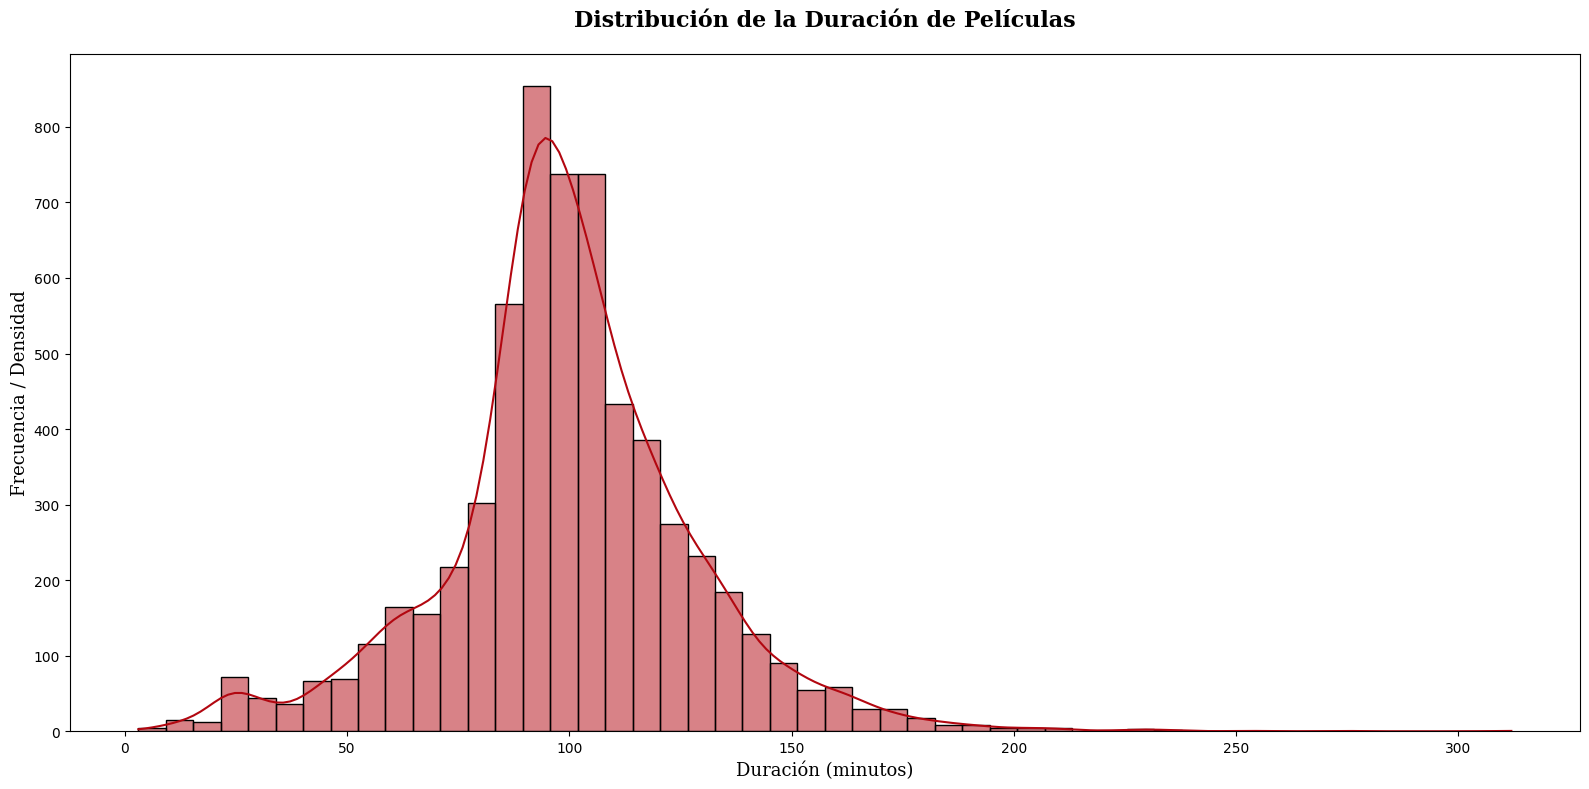

In [39]:
plt.figure(figsize=(16, 8))


# Creamos un histograma con kernel density estimate (kde) para la duración de las películas
sns.histplot(df_movie,
             x='duration(min)',
             bins= 50,
             kde = True,
             color= '#b20710')

plt.title('Distribución de la Duración de Películas', fontfamily='serif',
                fontweight='bold', fontsize=16, pad=20)
plt.xlabel('Duración (minutos)', fontsize=13, fontfamily='serif')
plt.ylabel('Frecuencia / Densidad', fontsize=13, fontfamily='serif')

plt.tight_layout()
plt.show()

## 5. Distribución Geográfica del Contenido de Netflix

In [40]:
# Separar países múltiples (ej: "United States, Canada")
df_exploded = df.assign(country=df['country'].str.split(',')).explode('country')
df_exploded['country'] = df_exploded['country'].str.strip()

# Contar títulos por país
country_counts = df_exploded['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Añadir columna logarítmica para colores
country_counts['log_count'] = np.log10(country_counts['count'] + 1)

# Crear mapa
fig = px.choropleth(
    country_counts,
    locations='country',
    locationmode='country names',
    color='log_count',
    color_continuous_scale='Reds',
    title='Cantidad de Películas y Series en Netflix por País',
    hover_name='country',
    hover_data={'count': True, 'log_count': False}  # Mostrar conteo real al pasar el ratón
)

# Ajustar diseño del gráfico
fig.update_layout(
    title_x=0.5,
    margin=dict(l=0, r=0, t=50, b=0),
    height=700
)

fig.show()


## 6. Word Cloud

In [41]:
from wordcloud import WordCloud
import re

In [42]:
# Palabras que quieremos eliminar
words = ['TV', 'Shows', 'Movies', 'International', 'Independent', 'Features']

# Crear un patrón regex para eliminar esas palabras
pattern = r'\b(?:' + '|'.join(words) + r')\b'

# Procesamiento completo
df_genres = df.assign(genres = df['listed_in'].str.split(r',|\s&\s')).explode('genres')
df_genres['genres'] = (
    df_genres['genres']
    .str.strip()
    .str.replace(pattern, '', regex=True)      # Elimina las palabras
    .str.replace(r'\s{2,}', ' ', regex=True)   # Reemplaza espacios dobles por uno solo
    .str.strip()                               # Limpia espacios al inicio y al final
)

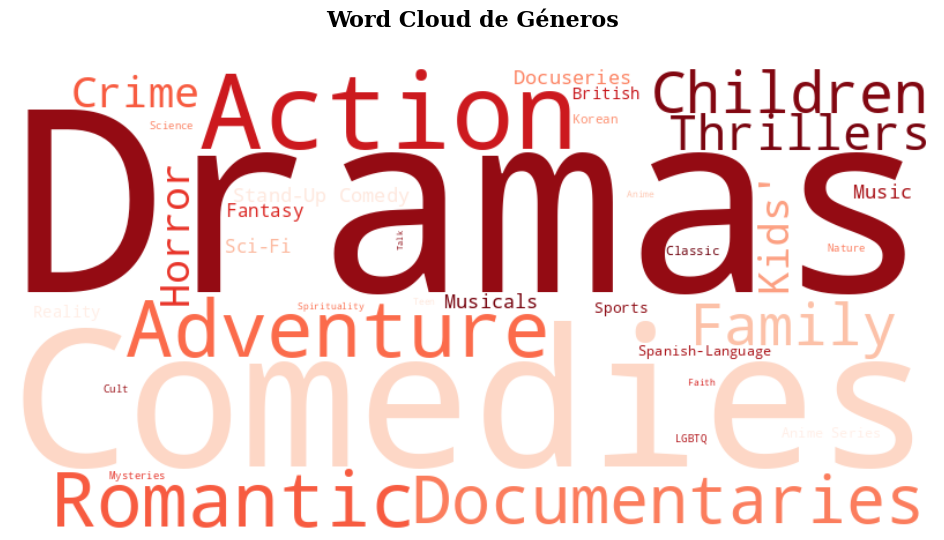

In [43]:
# Creamos un objeto WordCloud con tamaño específico, fondo blanco y colormap en tonos rojos
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Reds'
).generate_from_frequencies(df_genres['genres'].value_counts().to_dict())

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de Géneros', fontsize=16, fontfamily='serif',
                fontweight='bold', pad=30)
plt.show()